In [9]:
import h5py
import glob
import numpy as np
from util import plot
import matplotlib.pyplot as plt

In [2]:
%cd ..

/mnt/cup/labs/hasson/zaid/narrative-enc


/usr/people/zzada/.conda/envs/fconv2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [30]:
narrative = 'forgot'
narrative = 'black'

layer = 16

# within subject, 2 fold 

In [14]:
files = glob.glob(f'encoding_2fold/{narrative}/sub-*/model-gemma-2b_layer-{layer}/*h5')

scores = []
for filename in files:
    with h5py.File(filename, 'r') as f:
        cv_scores = f['cv_scores'][...]
        scores.append(cv_scores)
scores = np.stack(scores)
scores.shape

(46, 2, 2, 81924)

In [15]:
avg_tsk_scores = scores[:, :, 0].mean((0,1))
avg_llm_scores = scores[:, :, 1].mean((0,1))

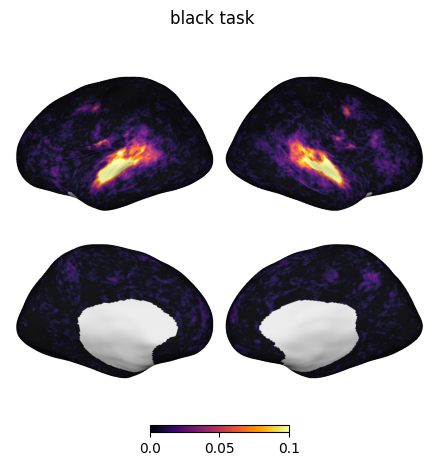

In [16]:
plot.surface_plot(avg_tsk_scores, surf_lh_fn=None, surf_rh_fn=None, title=f'{narrative} task', vmin=0, vmax=0.1, cmap='inferno');

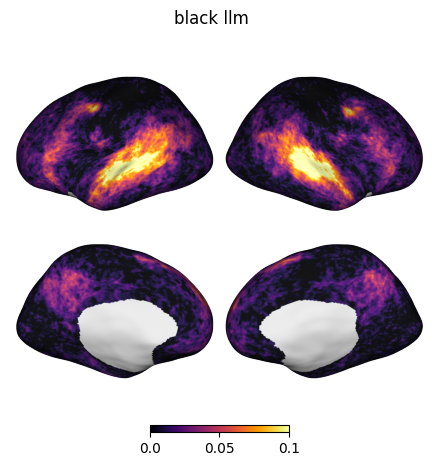

In [18]:
plot.surface_plot(avg_llm_scores, surf_lh_fn=None, surf_rh_fn=None, title=f'{narrative} llm', vmin=0, vmax=0.1, cmap='inferno');

# grouped subject, 2 fold

In [25]:
filename = f'encoding_group_2fold/{narrative}/sub-000/model-gemma-2b_layer-{layer}/sub-000.h5'
with h5py.File(filename, 'r') as f:
    cv_scores = f['cv_scores'][...]

In [26]:
grp_task_scores = cv_scores[:, 0].mean(0)
grp_llms_scores = cv_scores[:, 1].mean(0)

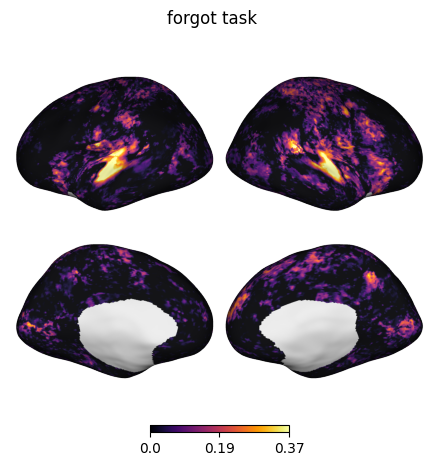

In [27]:
plot.surface_plot(grp_task_scores, surf_lh_fn=None, surf_rh_fn=None, title=f'{narrative} task', vmin=0, cmap='inferno');

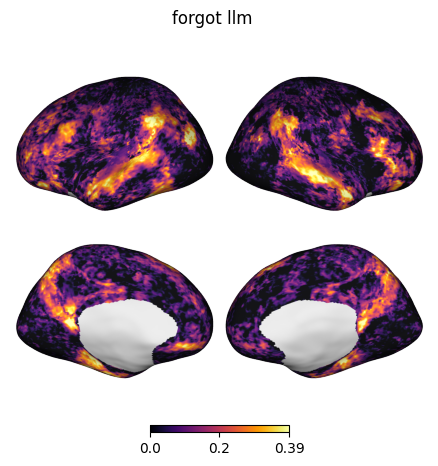

In [28]:
plot.surface_plot(grp_llms_scores, surf_lh_fn=None, surf_rh_fn=None, title=f'{narrative} llm', vmin=0, cmap='inferno');

# within subject, across-story test

In [37]:
files = glob.glob(f'encoding/black/sub-*/model-gemma-2b_layer-{layer}/*h5')

scores_black = []
scores_forgot = []
for filename in files:
    with h5py.File(filename, 'r') as f:
        scores_black.append(f['scores1'][...])
        scores_forgot.append(f['scores2'][...])
scores_black = np.stack(scores_black)
scores_forgot = np.stack(scores_forgot)
scores_black.shape

(46, 2, 81924)

In [39]:
avg_scores_black = scores_black[:, 1].mean(0)
avg_scores_forgot = scores_forgot[:, 1].mean(0)

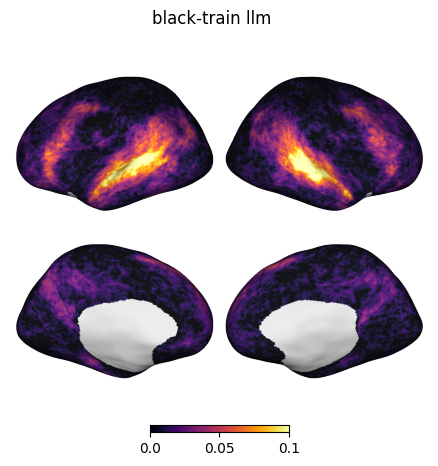

In [46]:
plot.surface_plot(avg_scores_black, surf_lh_fn=None, surf_rh_fn=None, title='black-train llm', vmin=0, vmax=0.1, cmap='inferno');

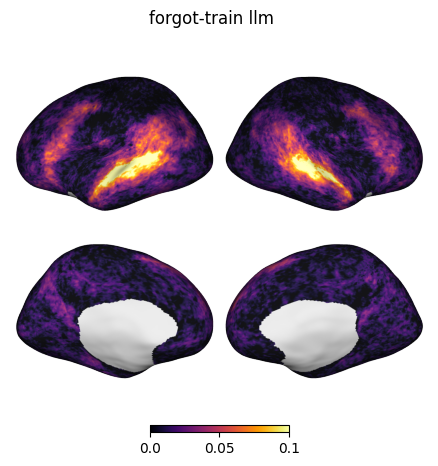

In [47]:
plot.surface_plot(avg_scores_forgot, surf_lh_fn=None, surf_rh_fn=None, title='forgot-train llm', vmin=0, vmax=0.1, cmap='inferno');

# grouped subject, across-story test

In [32]:
filename = f'encoding_group/black/sub-000/model-gemma-2b_layer-{layer}/sub-000.h5'
with h5py.File(filename, 'r') as f:
    print(f.keys())
    scores_black = f['scores1'][...]
    scores_forgot = f['scores2'][...]

<KeysViewHDF5 ['actual1', 'actual2', 'preds1', 'preds2', 'scores1', 'scores2']>


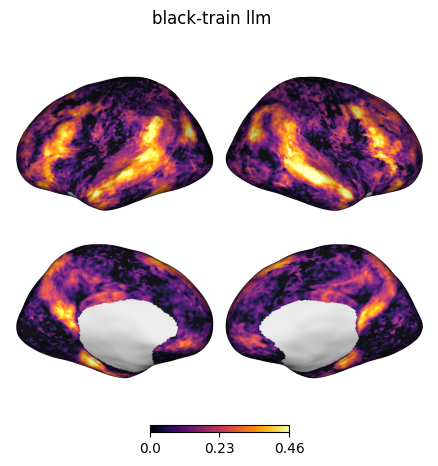

In [35]:
plot.surface_plot(scores_black[1], surf_lh_fn=None, surf_rh_fn=None, title='black-train llm', vmin=0, cmap='inferno');

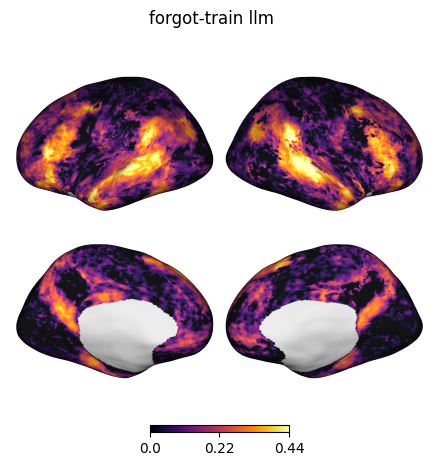

In [36]:
plot.surface_plot(scores_forgot[1], surf_lh_fn=None, surf_rh_fn=None, title='forgot-train llm', vmin=0, cmap='inferno');